In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

np.random.seed(seed=1960)

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})


In [2]:
df_train.head(12)

Date     Signal
0  2016-01-25   1.904897
1  2016-01-26  -0.429674
2  2016-01-27   0.685613
3  2016-01-28   3.025123
4  2016-01-29   4.401209
5  2016-01-30   6.495635
6  2016-01-31   7.040249
7  2016-02-01   8.398452
8  2016-02-02   7.632028
9  2016-02-03   9.793939
10 2016-02-04   8.920635
11 2016-02-05  10.047437

In [3]:
df_train.tail(12)

Date     Signal
348 2017-01-07  20.726778
349 2017-01-08  20.457208
350 2017-01-09  21.185194
351 2017-01-10  23.803768
352 2017-01-11  24.368608
353 2017-01-12  25.493171
354 2017-01-13  24.279326
355 2017-01-14  25.904933
356 2017-01-15  28.600812
357 2017-01-16   7.913264
358 2017-01-17   9.501436
359 2017-01-18  11.699889

<AxesSubplot: xlabel='Date'>

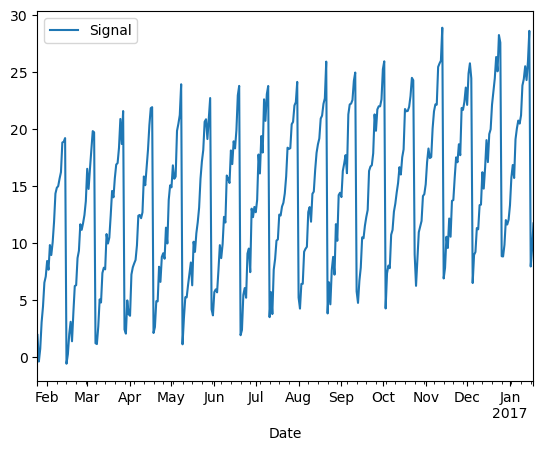

In [4]:
df_train.plot('Date' , ['Signal'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.std:TRAINING_ENGINE_START {'Signals': ['Signal'], 'Horizons': {'Signal': 7}}
INFO:pyaf.std:TRAINING_ENGINE_END 4.195
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-01T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Signal' Length=360  Min=-0.621978 Max=28.875373  Mean=13.929719 StdDev=6.723008
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Signal' Min=0.0 Max=1.0  Mean=0.493322 StdDev=0.227919
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)' [LinearTrend + Seasonal_DayOfWeek + AR]
INFO:pyaf.std:TREND_DETAIL '_Signal_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_LinearTrend_residue_Seasonal_DayOfWeek' [Seasonal_DayOfWeek]
INFO:pyaf.std:AUTOREG_DETAIL '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_resi

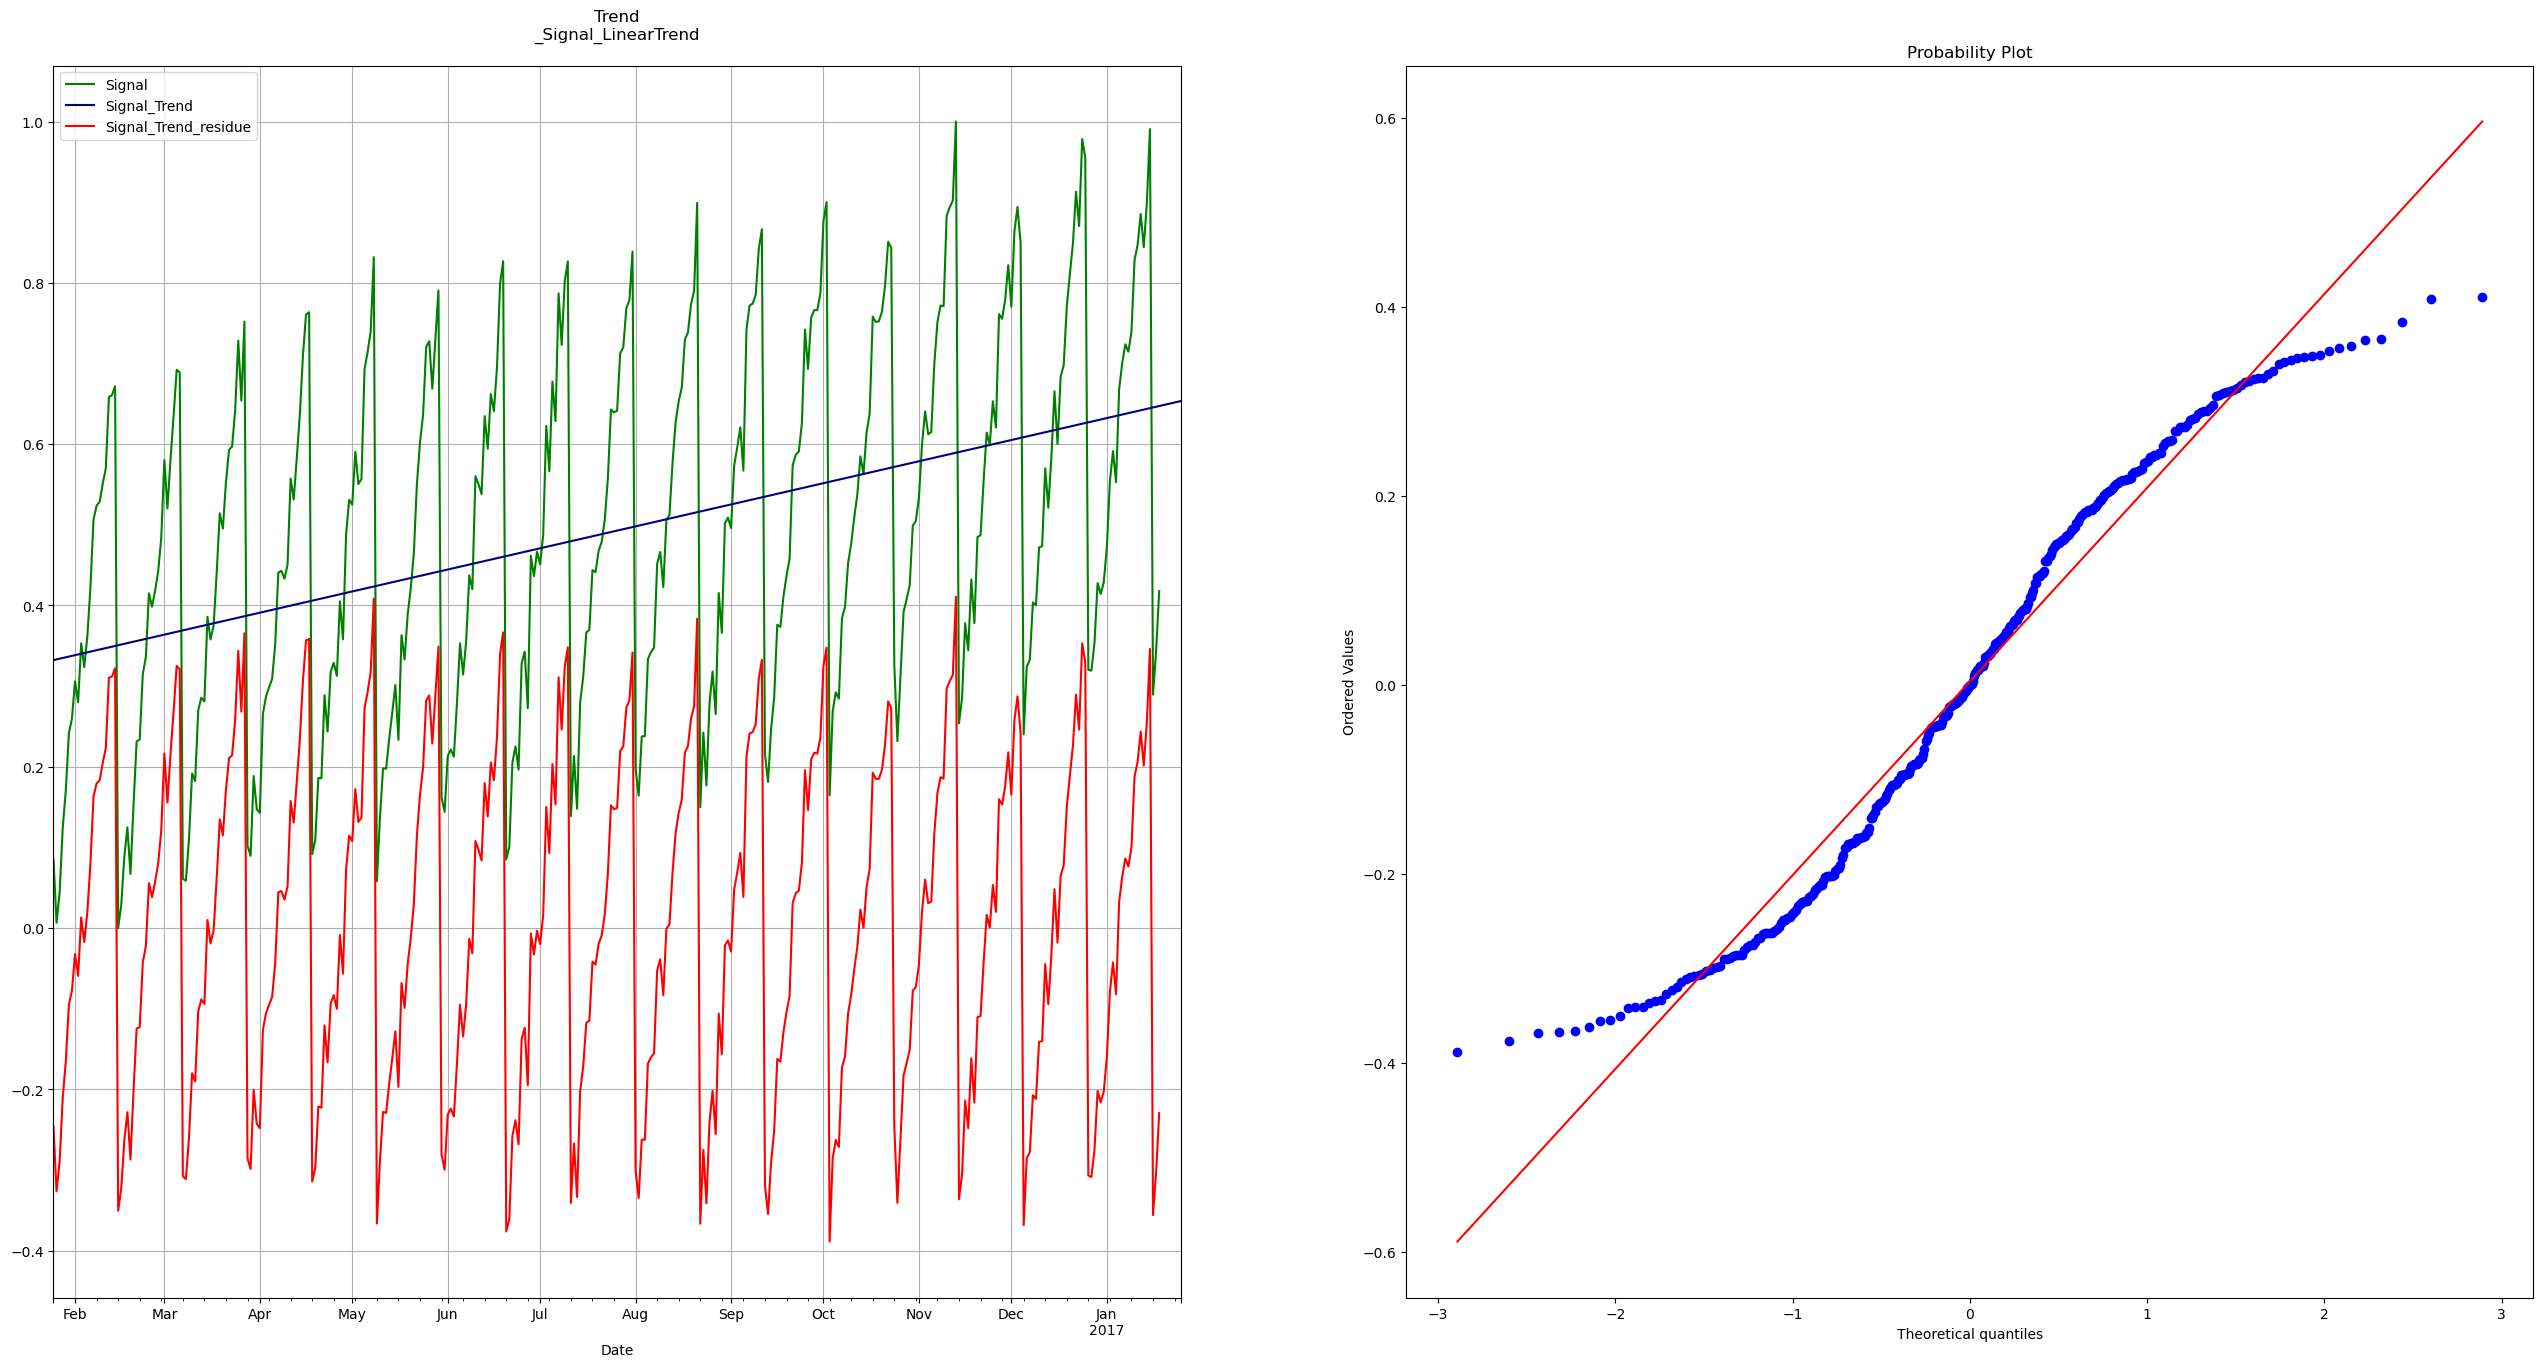

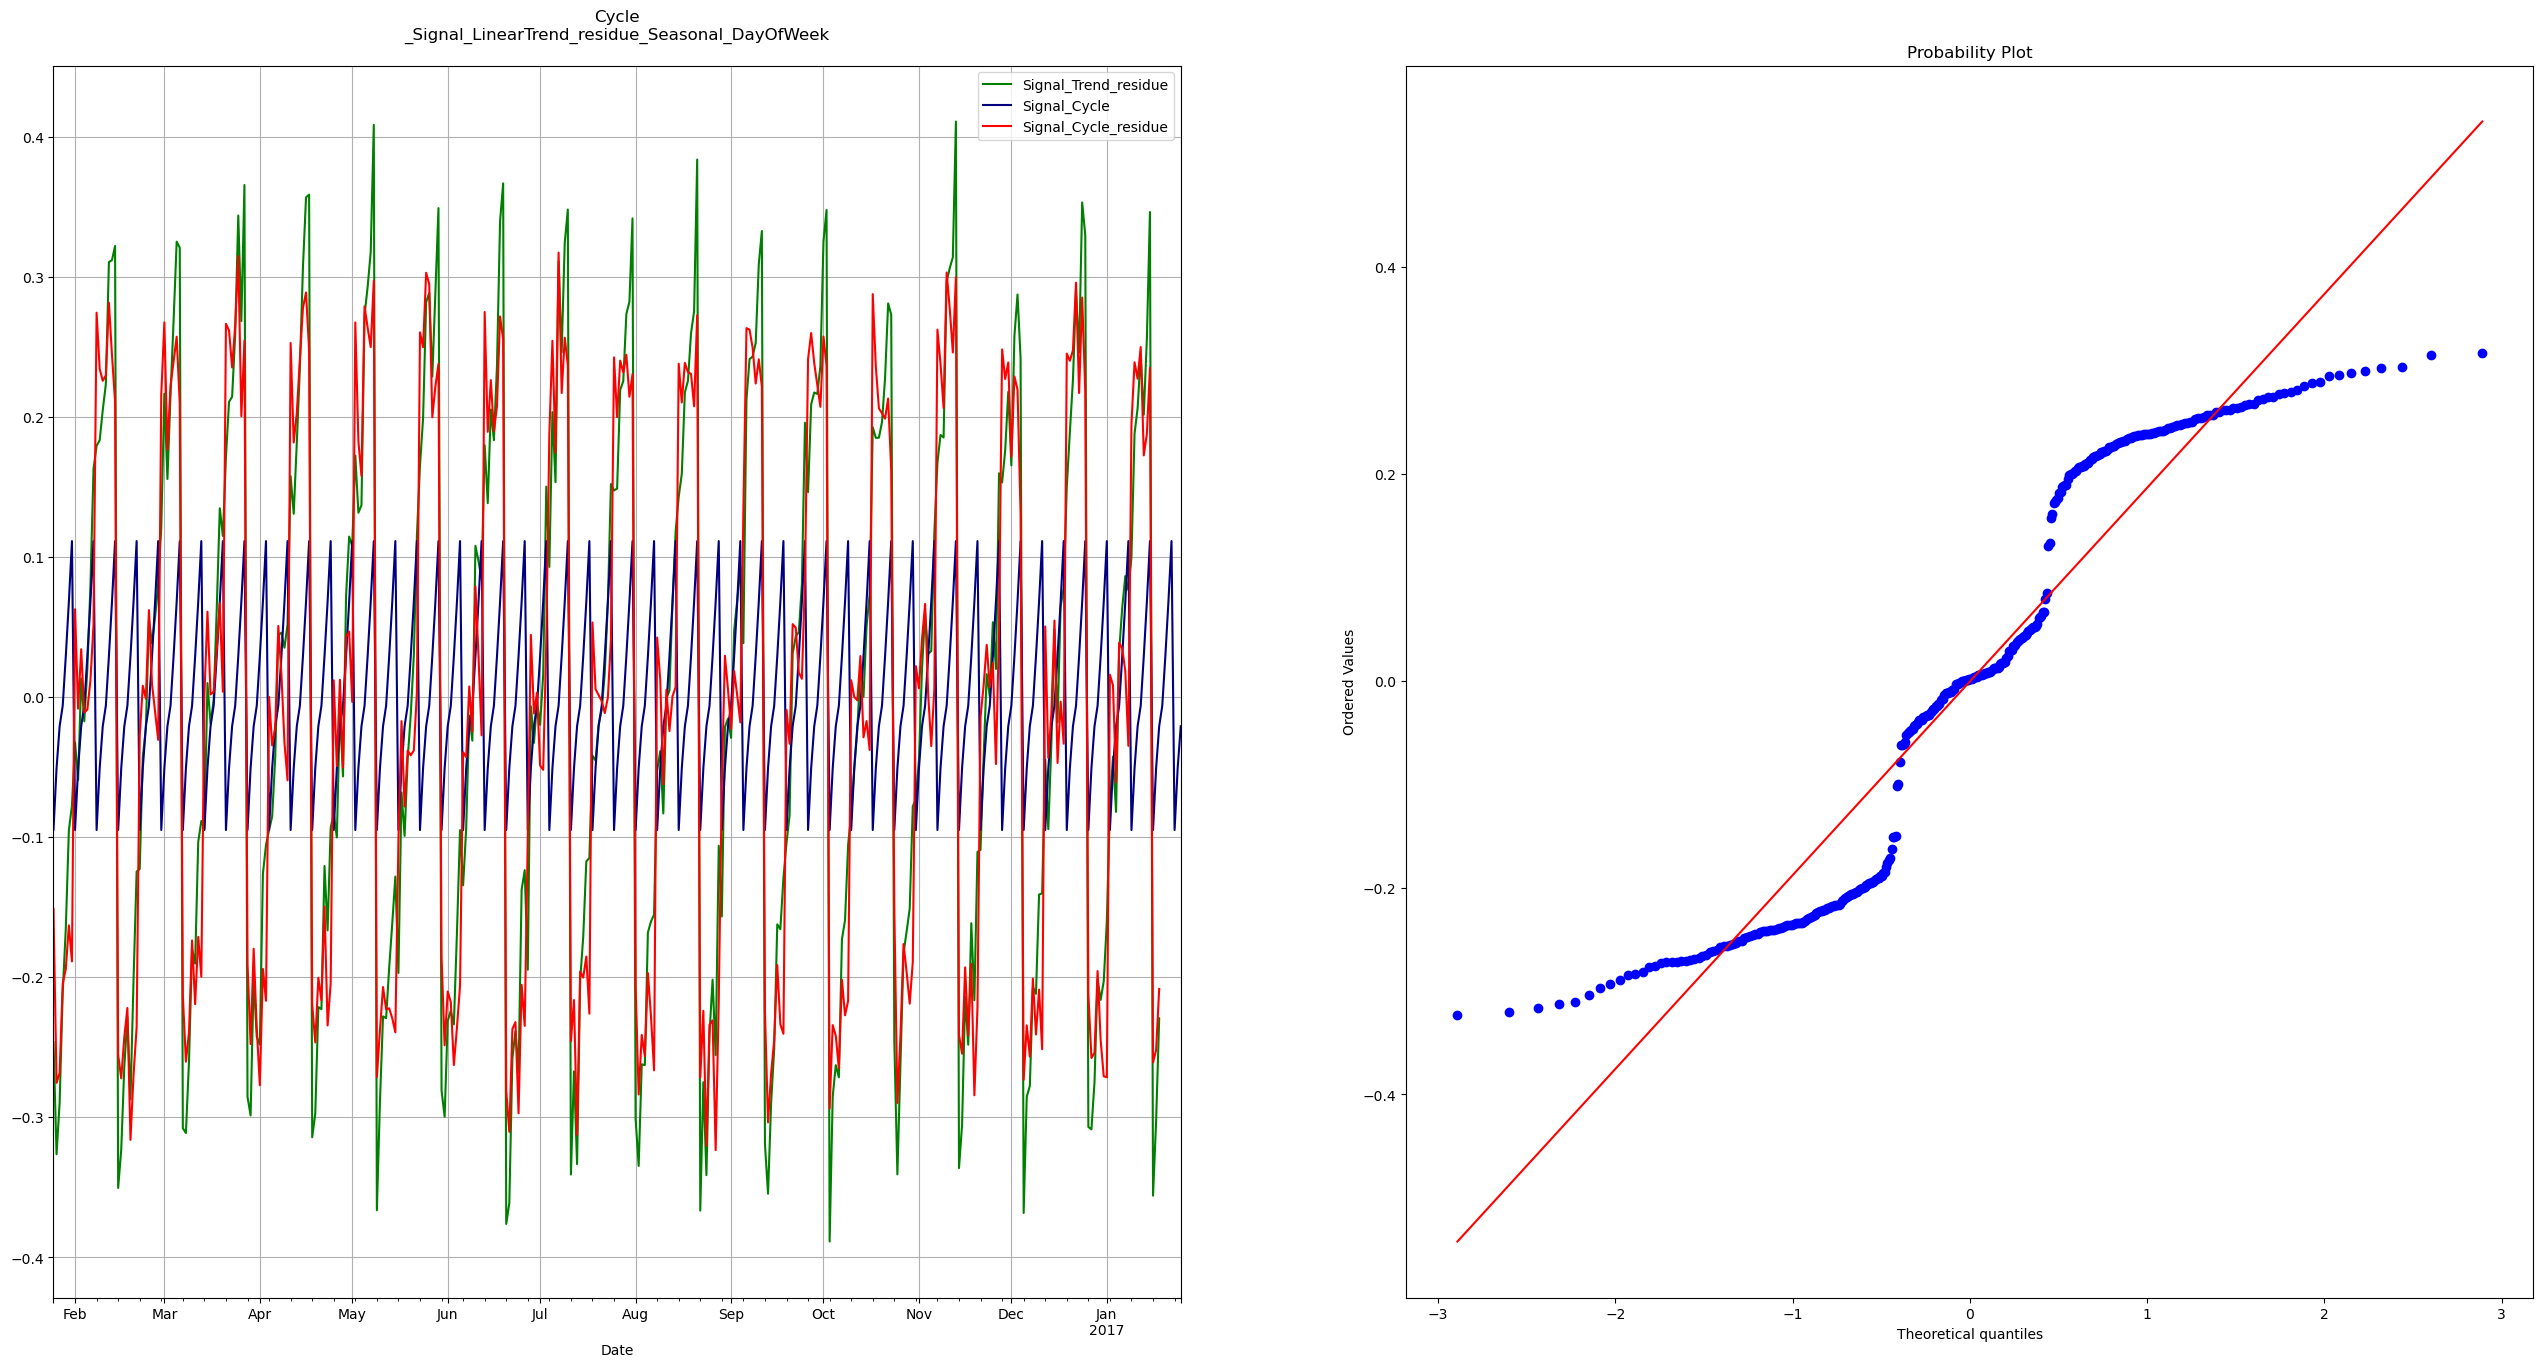

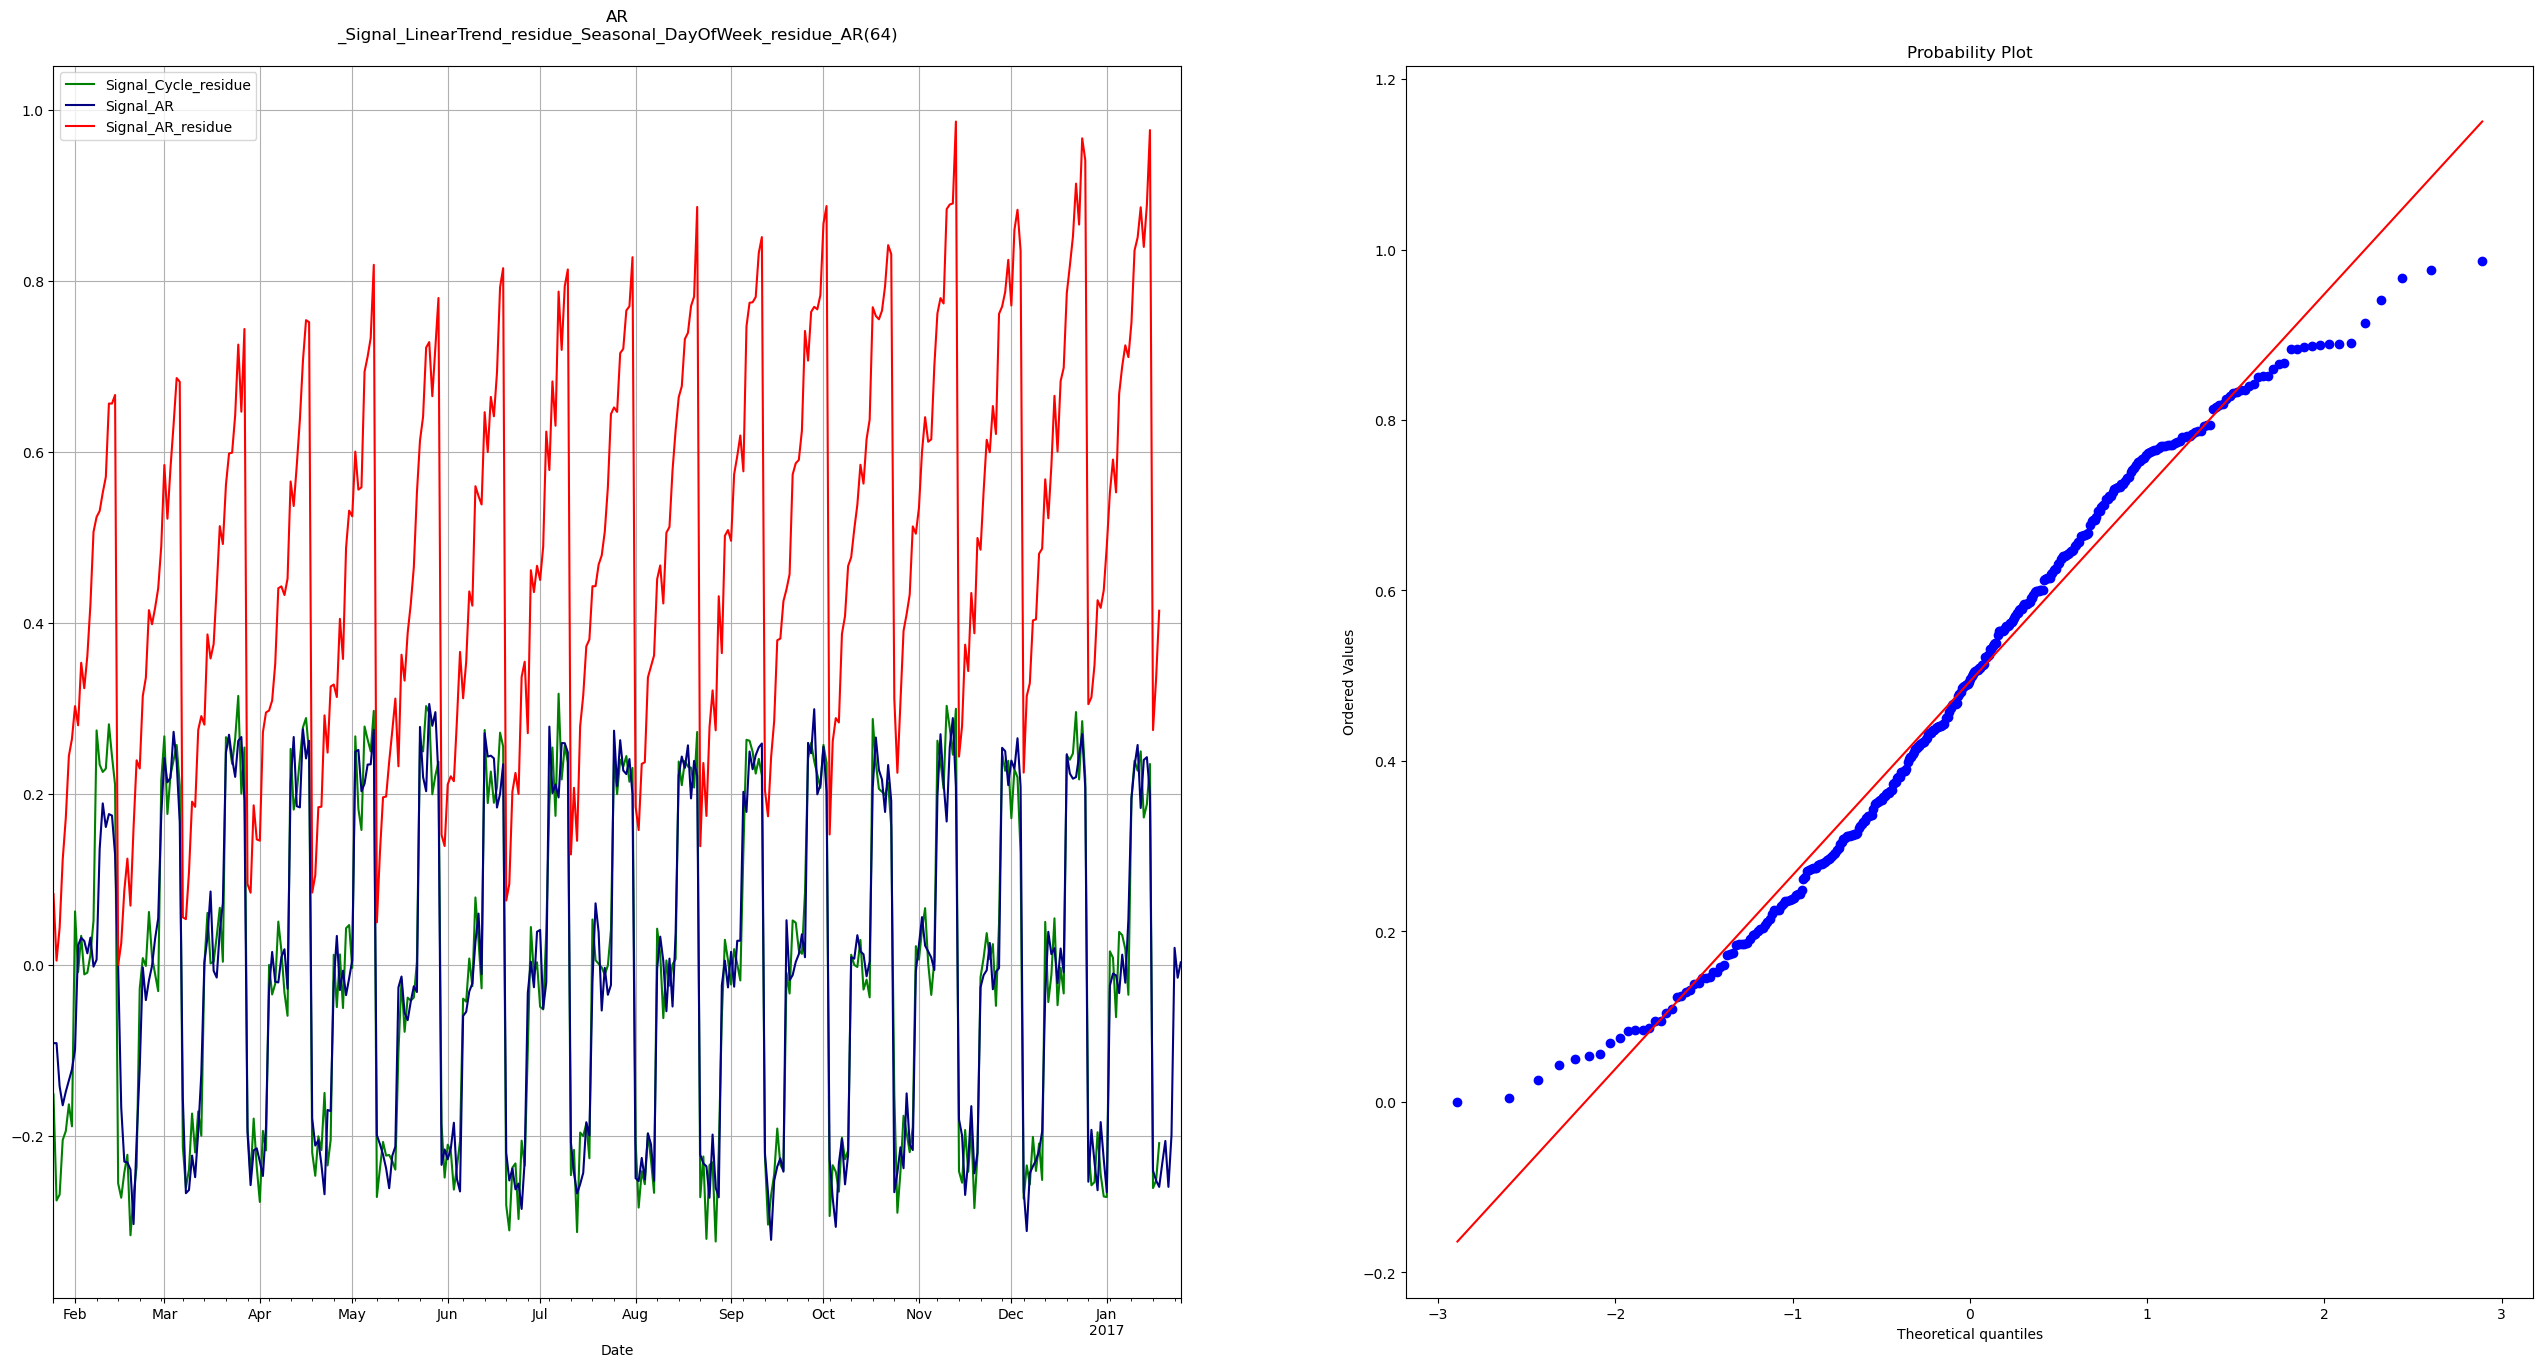

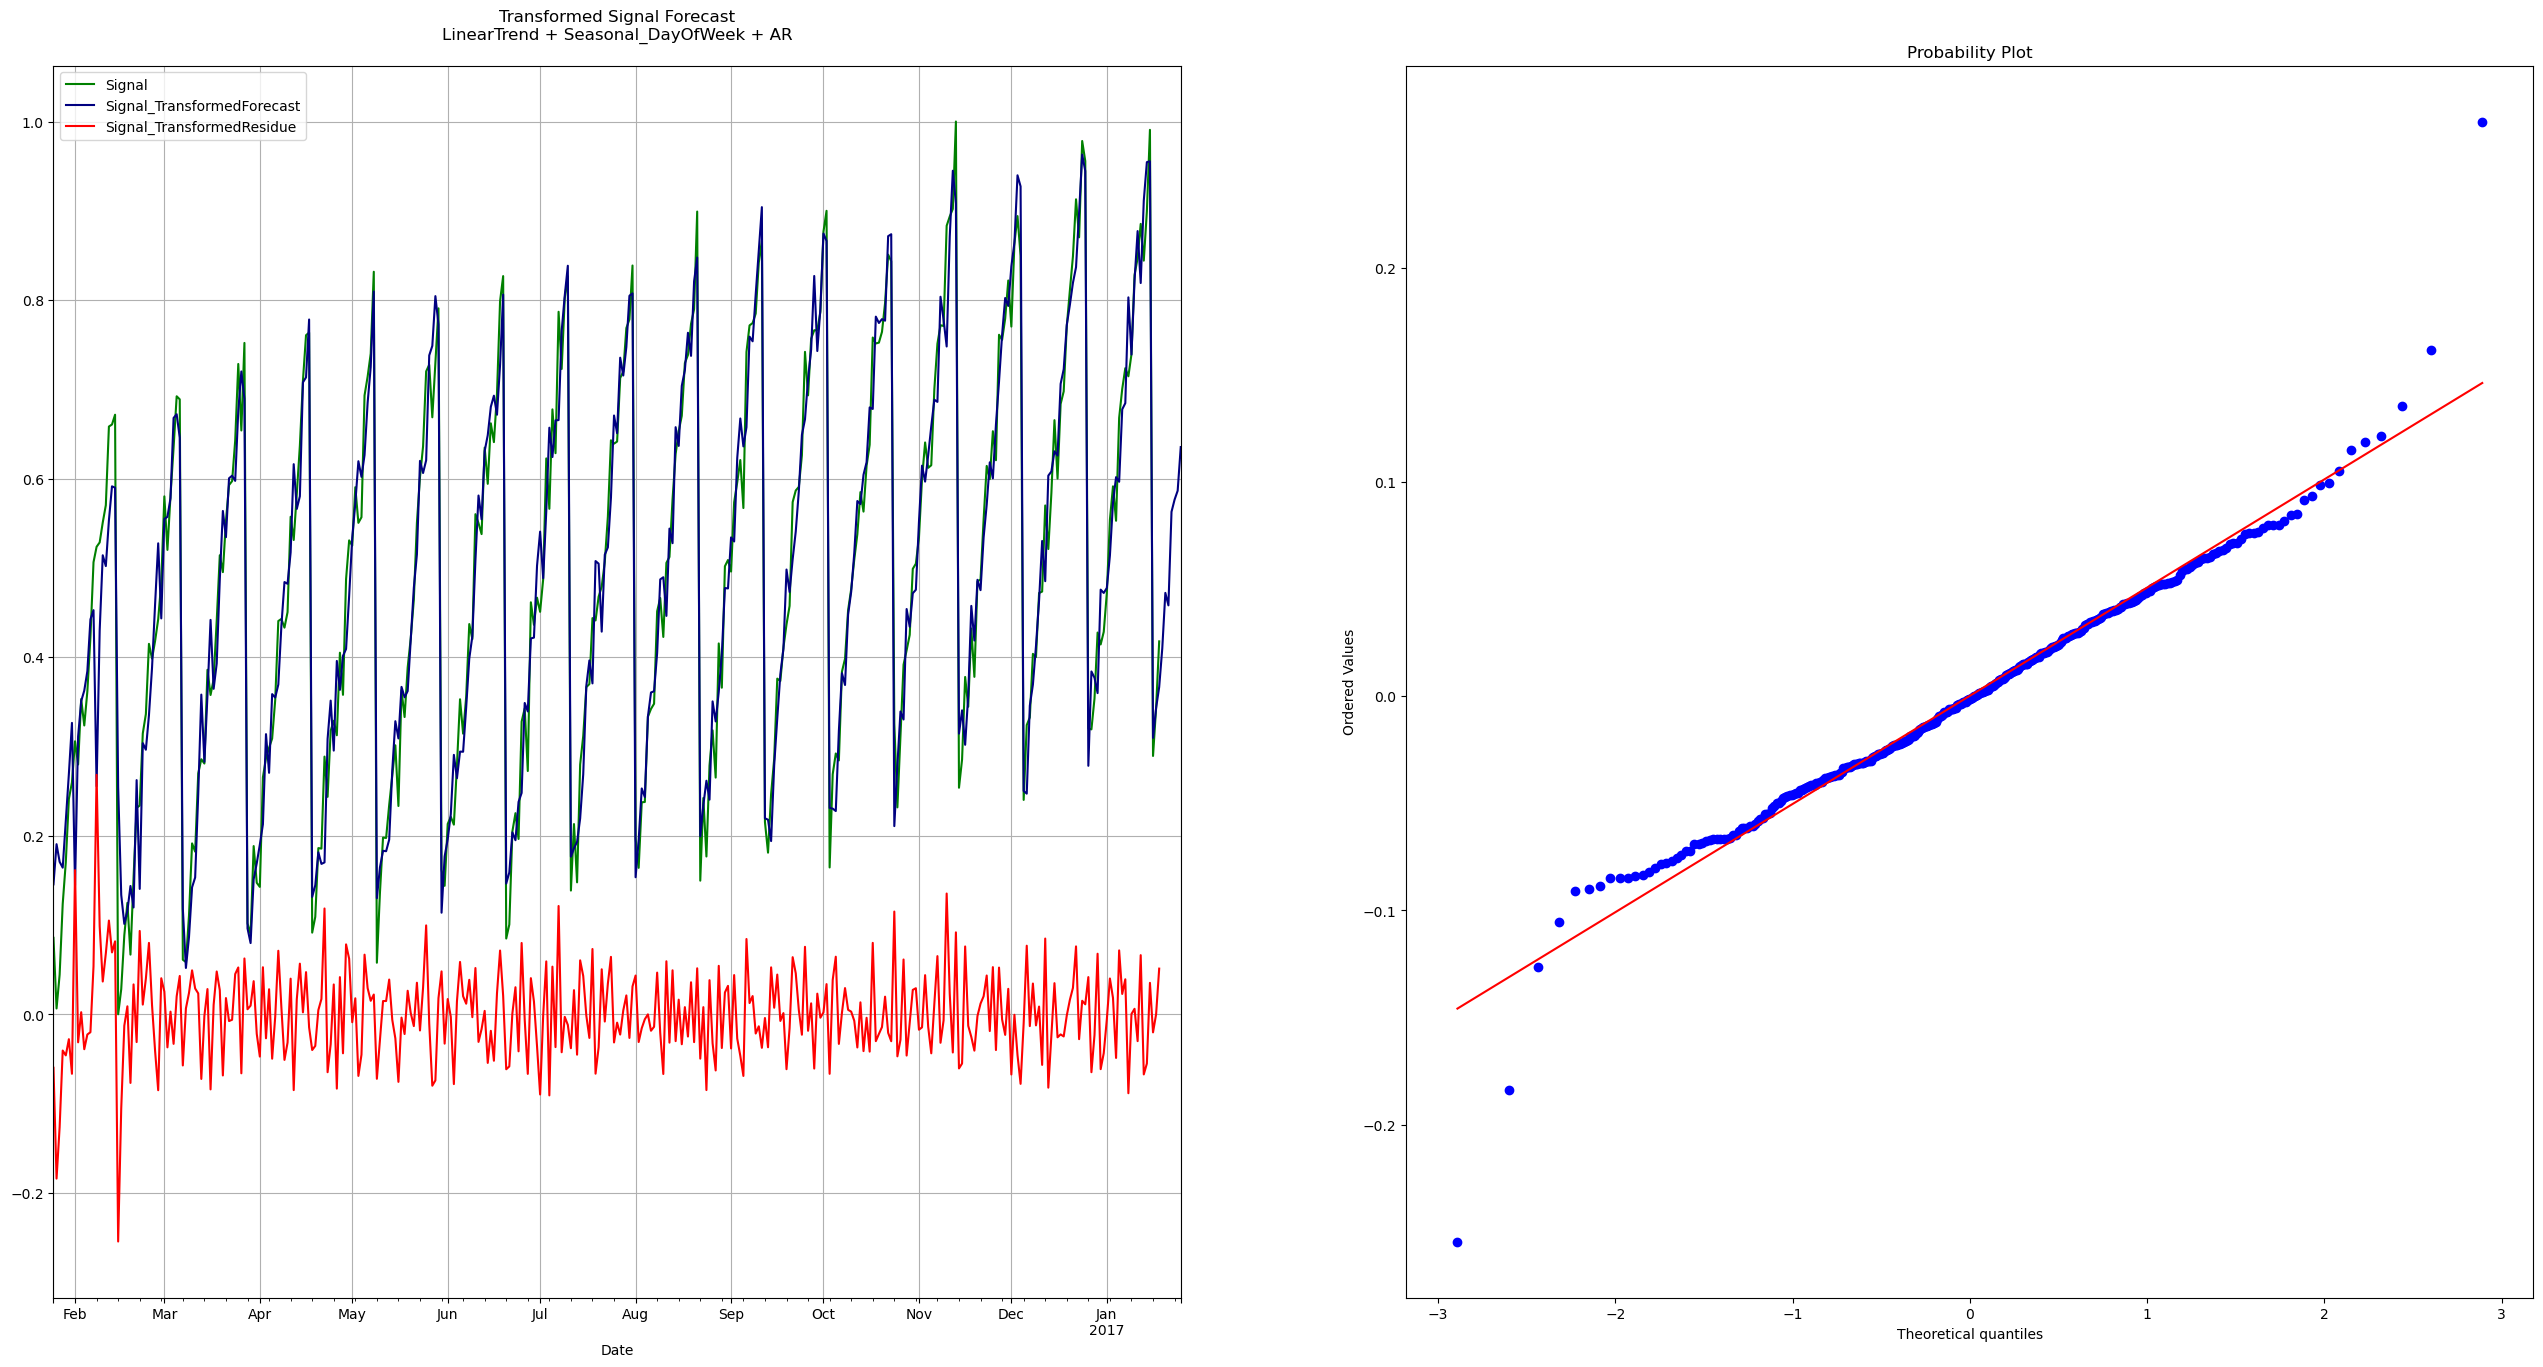

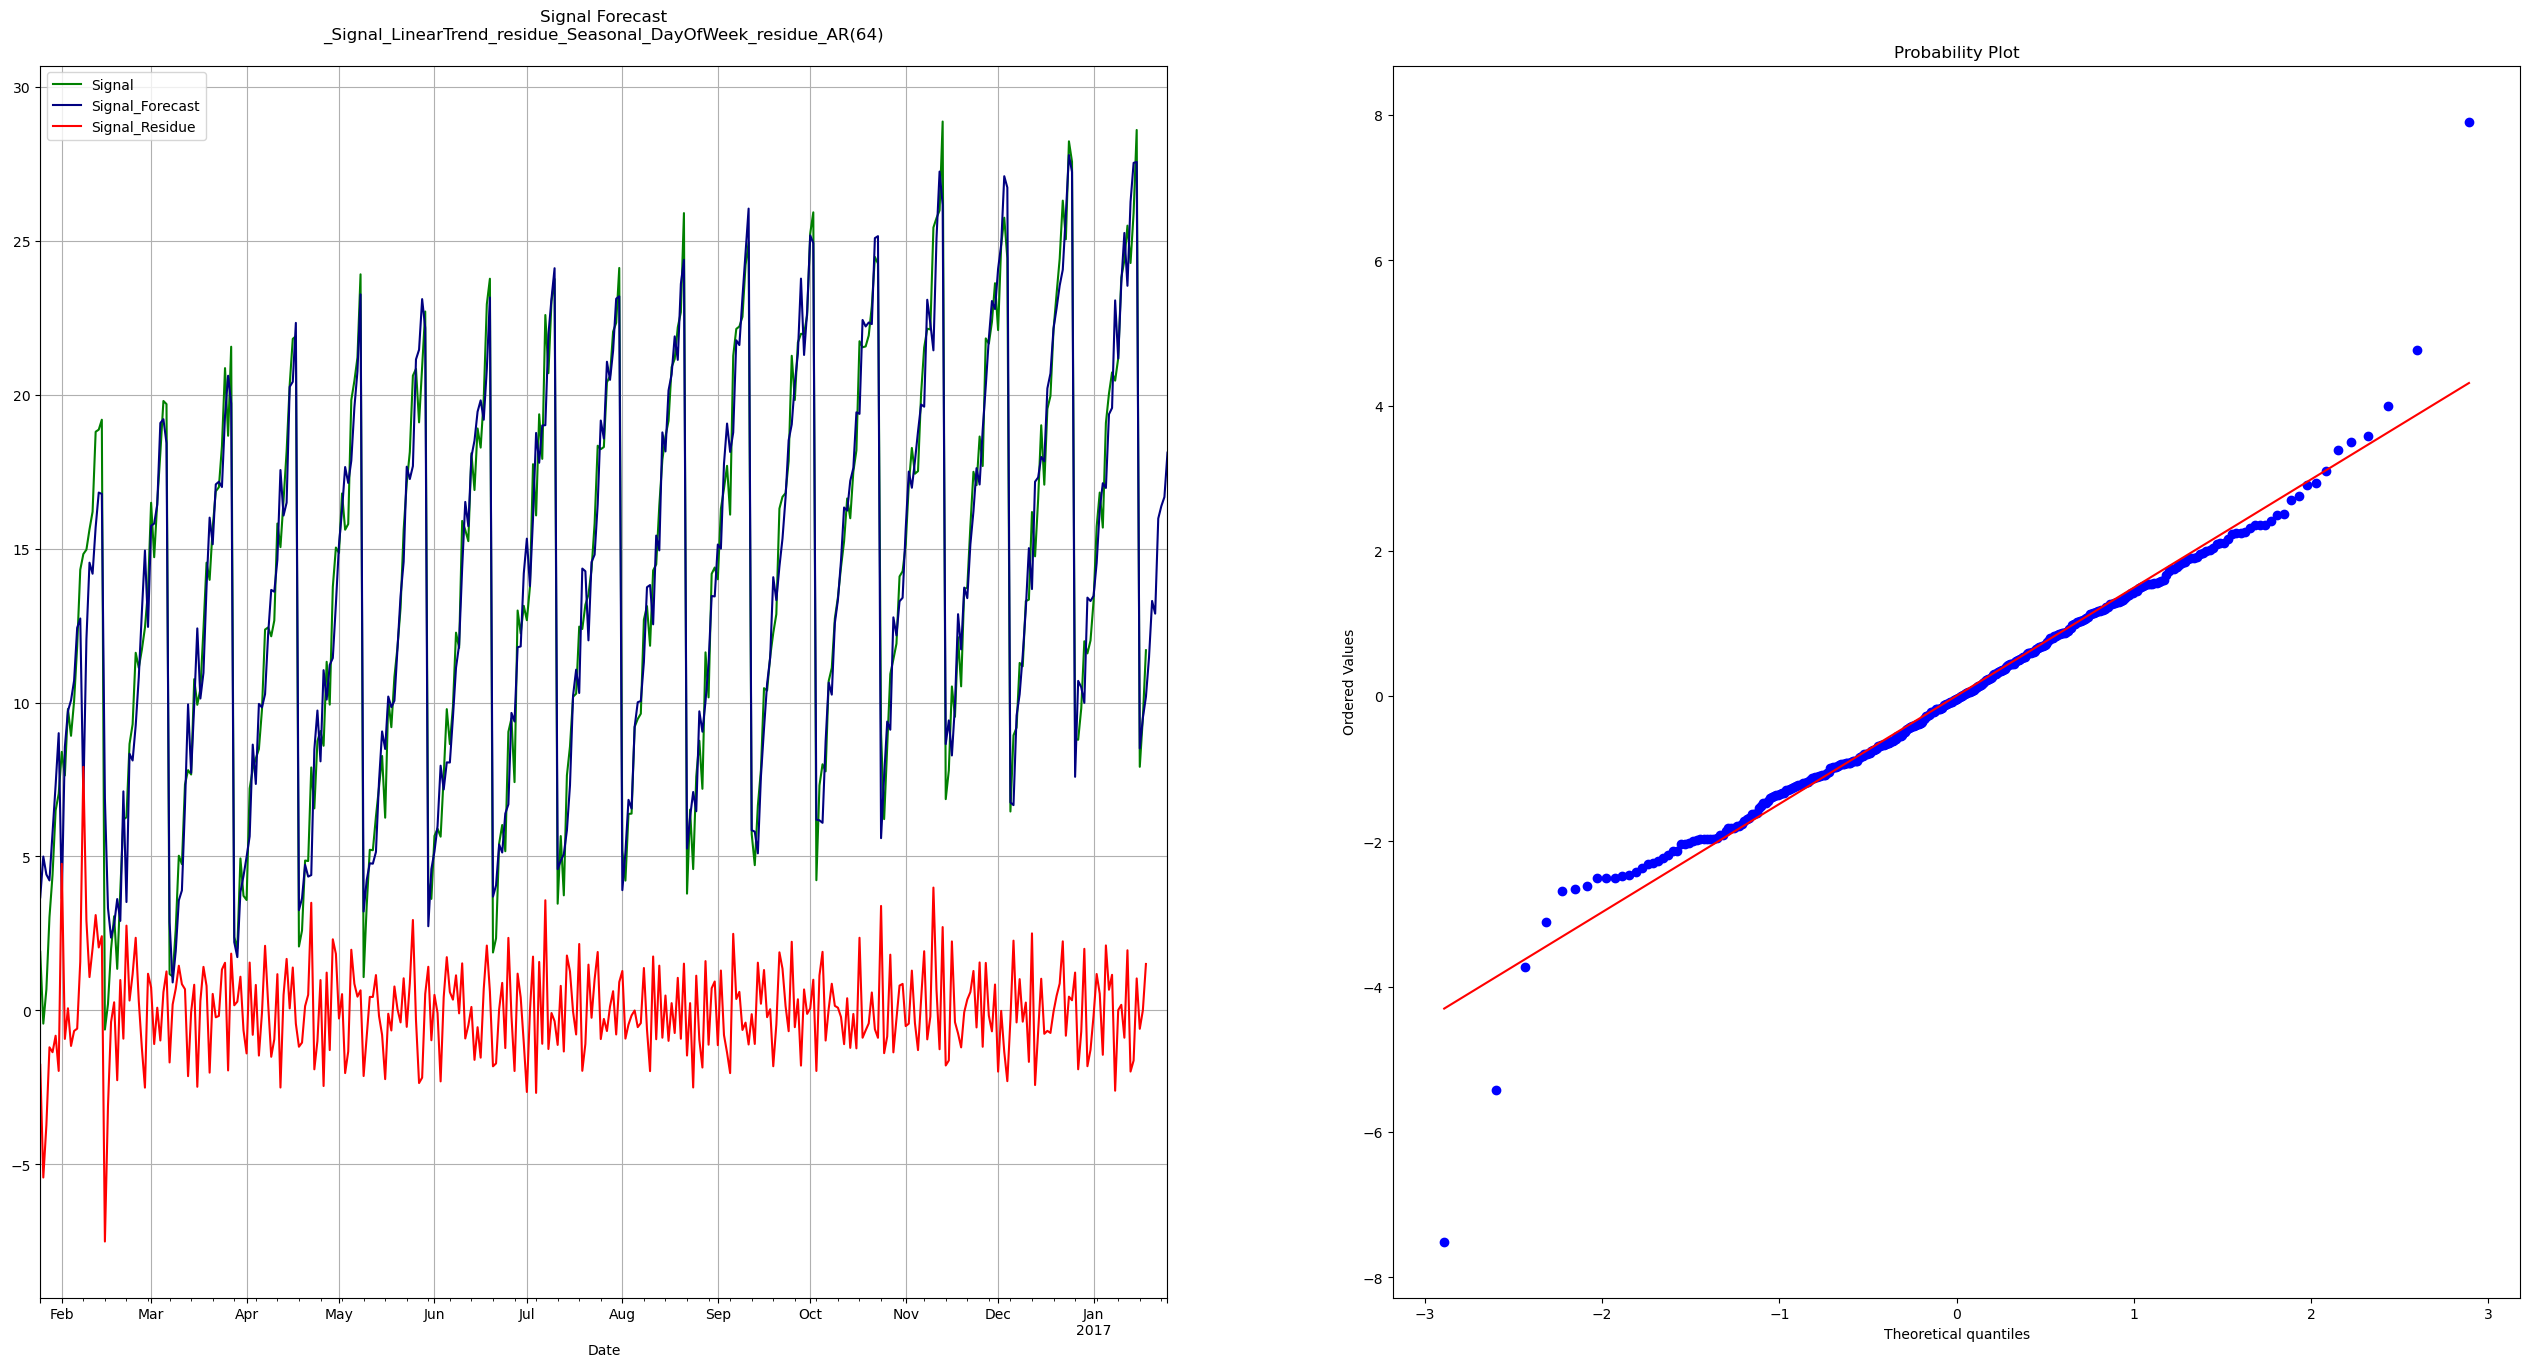

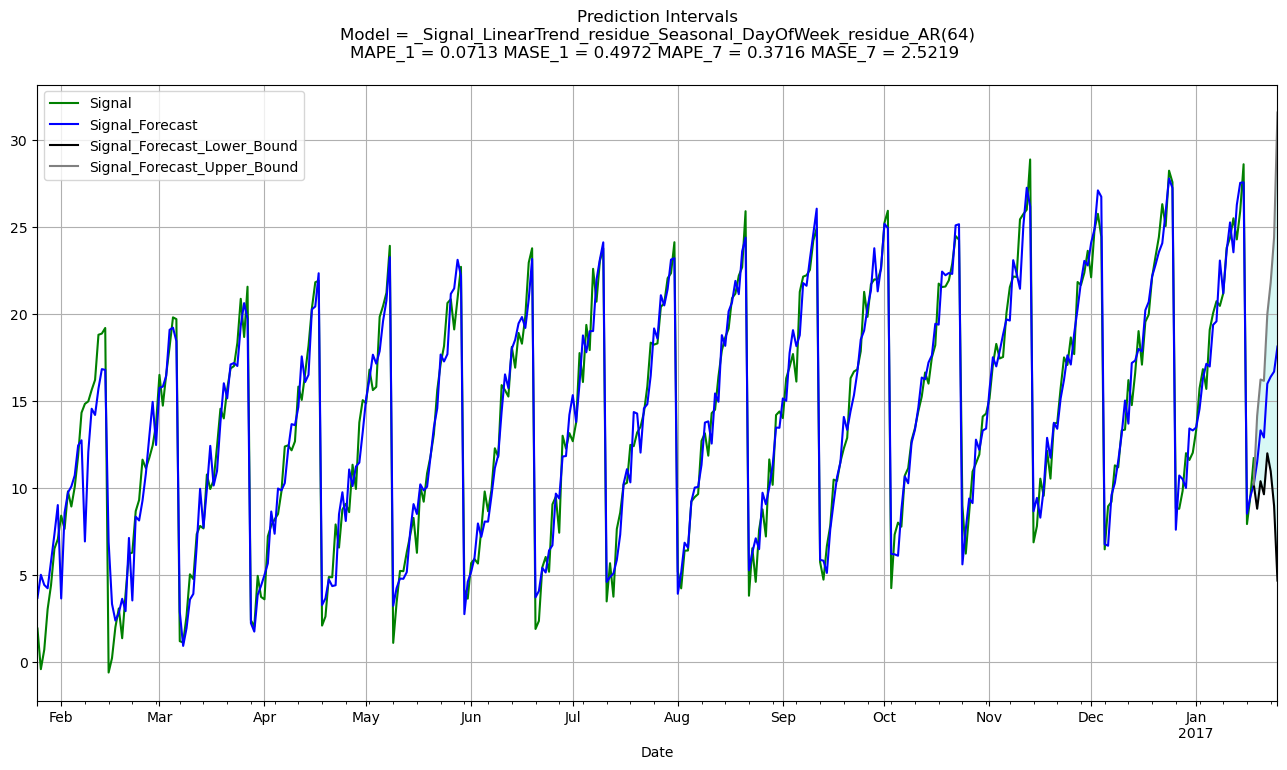

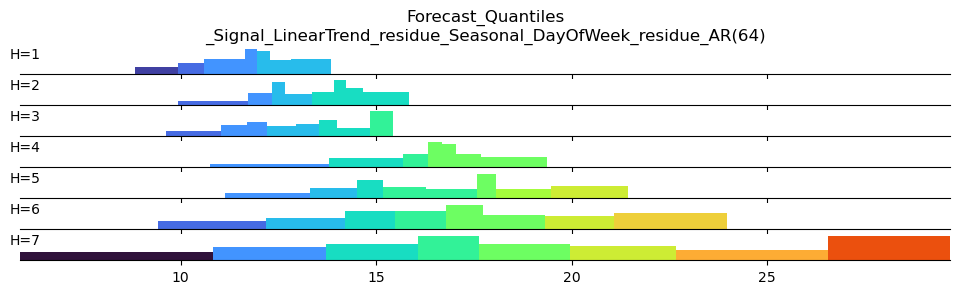

In [6]:
lEngine.standardPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
# Future dates : ['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000' '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000' '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000' '2017-01-25T00:00:00.000000000']
print(df_forecast['Date'].tail(7).values)

# signal forecast : [ 9.74934646  10.04419761  12.15136455  12.20369717  14.09607727 15.68086323  16.22296559]
print(df_forecast['Signal_Forecast'].tail(7).values)

INFO:pyaf.std:FORECASTING_ENGINE_START {'Signals': ['Signal'], 'Horizons': {'Signal': 7}}
INFO:pyaf.std:FORECASTING_ENGINE_END 0.312


Index(['Date', 'Signal', 'row_number', 'Date_Normalized', 'Signal_scaled',
       '_Signal', '_Signal_LinearTrend', '_Signal_LinearTrend_residue',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)_residue',
       'Signal_Transformed', '_Signal_Trend', '_Signal_Trend_residue',
       '_Signal_Cycle', '_Signal_Cycle_residue', '_Signal_AR',
       '_Signal_AR_residue', '_Signal_TransformedForecast',
       'Signal_TransformedForecast_inverted', 'Signal_Forecast',
       '_Signal_TransformedResidue', 'Signal_Residue',
       'Signal_Forecast_Lower_Bound', 'Signal_Forecast_Upper_Bound',
       'Signal_Forecast_Quantile_2', 'Signal_Forecast_Quantile_14',
       'Signal_Forecast_Quantile_26', 'Signal_Forecast_Quantile_38',
       'Signal_Forecast_Quantile_50', 'Signal_Forecast_Quan

In [8]:
print(lEngine.to_json())

{
    "Signal": {
        "Complexity": {
            "AR": "L",
            "Cycle": "S",
            "Decomposition": "S",
            "Transformation": "S",
            "Trend": "S"
        },
        "Dataset": {
            "Signal": "Signal",
            "Time": {
                "Horizon": 7,
                "TimeDelta": "<DateOffset: days=1>",
                "TimeMax": "2017-01-18 00:00:00",
                "TimeMin": "2016-01-25 00:00:00",
                "TimeVariable": "Date"
            },
            "Training_Signal_Length": 360
        },
        "Model": {
            "AR_Model": "AR",
            "Best_Decomposition": "_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)",
            "Cycle": "Seasonal_DayOfWeek",
            "Signal_Decomposition_Type": "T+S+R",
            "Signal_Transoformation": "NoTransf",
            "Trend": "LinearTrend"
        },
        "Model_Performance": {
            "1": {
                "AUC": 0.4987,
                "Diff